## Hotel Booking Cancellation Prediction - Group 9

In [3]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')




Importing the Libraries

In [4]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

In [5]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Data Preprocessing

In [6]:
hotel.head(4).T

,0,1,2,3
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0
lead_time,342,737,7,13
arrival_date_year,2015,2015,2015,2015
arrival_date_month,July,July,July,July
arrival_date_week_number,27,27,27,27
arrival_date_day_of_month,1,1,1,1
stays_in_weekend_nights,0,0,0,0
stays_in_week_nights,0,0,1,1
adults,2,2,1,1


In [7]:
tmp = hotel.isnull().sum().reset_index(name='missing_val')
tmp[tmp['missing_val']!= 0]

,index,missing_val
10,children,4
13,country,488
23,agent,16340
24,company,112593


In [8]:
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [10]:
copy=hotel.copy()

In [11]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [12]:
copy['cancel']= label_encoder.fit_transform(copy['is_canceled'])

## Exploratory Data Analysis

In [ ]:
num_to_cancel_state = {0: "canceled", 1: "not canceled"}
num_classes = len(num_to_cancel_state)

df_corr = copy.corr().cancel[:-1]
indices = df_corr.abs().sort_values(ascending=False).index[:6]
indices = indices.append(pd.Index(['cancel']))

copy.cancel.astype(object, copy=False)
copy.cancel.replace(num_to_cancel_state, inplace=True)

g = sns.pairplot(
    copy[indices],
    hue="cancel",
    hue_order=num_to_cancel_state.values(),
    palette=["green", "red"]
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=10)
    ax.set_ylabel(ax.get_ylabel(), rotation=80)
    ax.yaxis.get_label().set_horizontalalignment('right')

In [14]:
corr= hotel.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

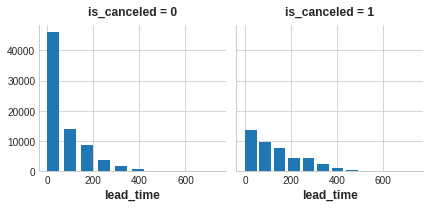

In [15]:
grid = sns.FacetGrid(hotel, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

In [17]:
X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

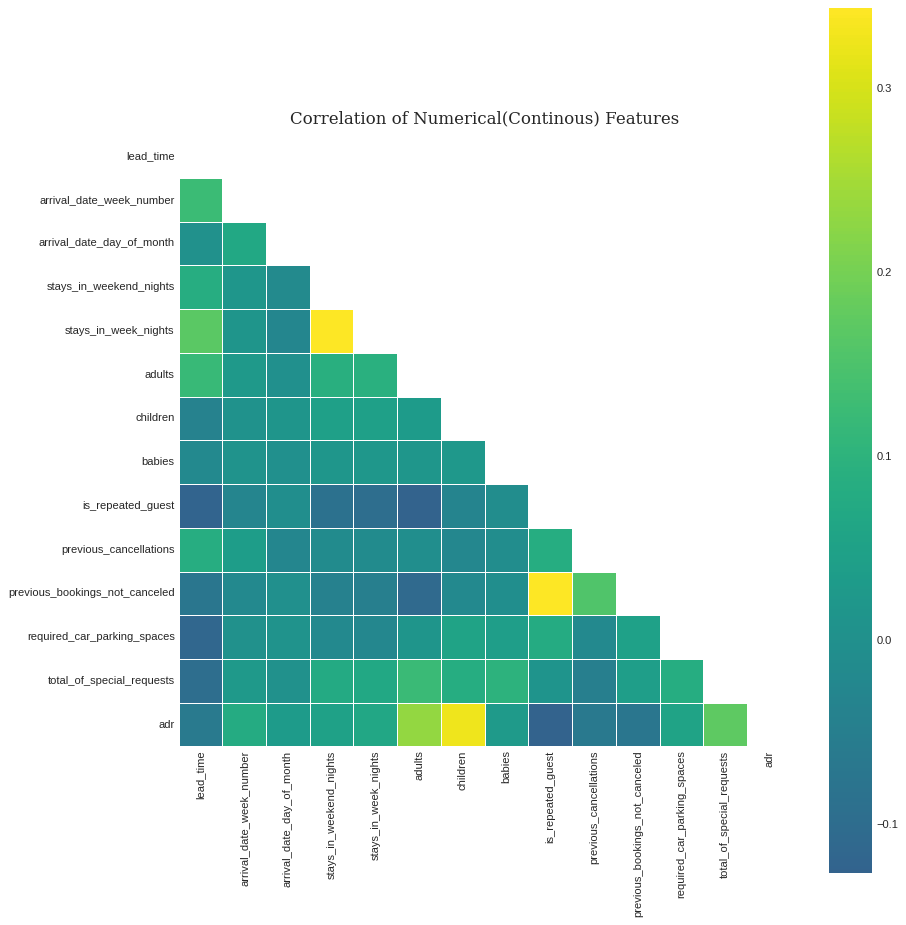

In [18]:
import numpy as np
#Taking all columns except URL 
corr = hotel[features_num].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='viridis', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

In [19]:
X_train.shape, X_valid.shape

((89542, 62), (29848, 62))

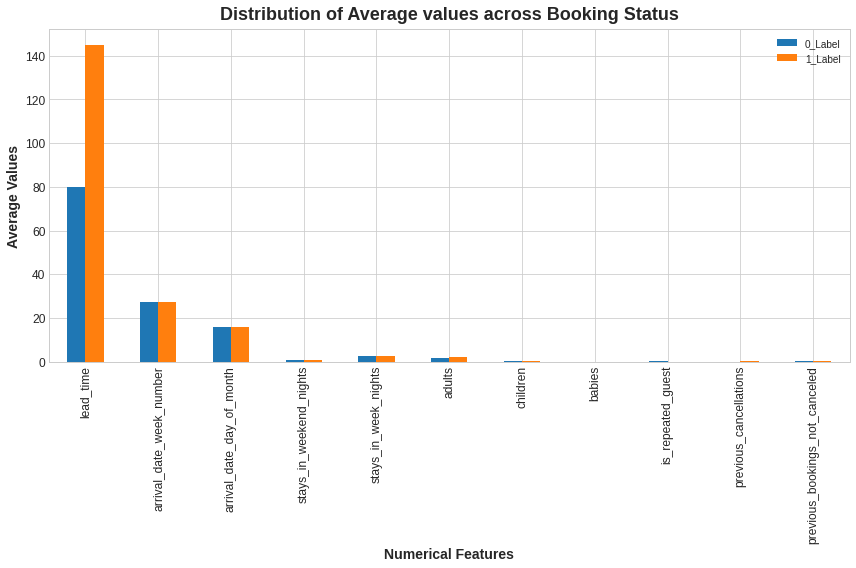

In [20]:
df_distr =hotel.groupby('is_canceled')[features_num].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Booking Status", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



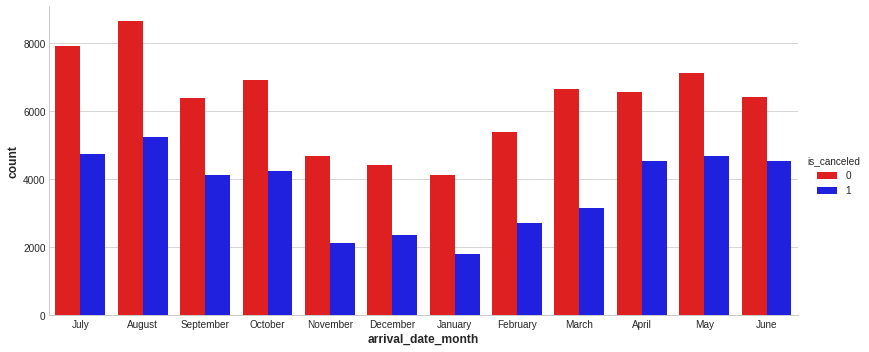

In [72]:
sns.catplot("arrival_date_month", hue="is_canceled", data=hotel, kind="count",height=5.0, aspect=18.7/8.27 ,palette=["red", "blue"])

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


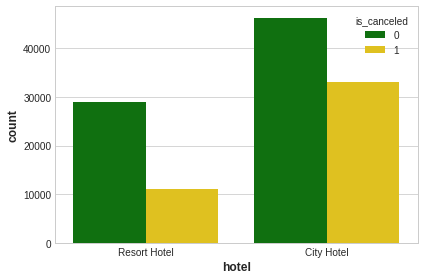

In [74]:
import seaborn as sns

sns.countplot(data=hotel, x='hotel', hue='is_canceled', palette=["green", "gold"])
resort_canceled = hotel[(hotel['hotel']=='Resort Hotel') & (hotel['is_canceled']==1)]
city_canceled = hotel[(hotel['hotel']=='City Hotel') & (hotel['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(hotel[hotel['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(hotel[hotel['hotel']=='City Hotel'])))


In [84]:
import plotly.express as px


year_count = hotel.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

fig = px.bar(year_perct, x='arrival_date_year', y='count', color='is_canceled', text='count')

fig.update_layout(
    title='Percentage of Cancellations by Year',
    xaxis_title='Year',
    yaxis_title='Percentage',
    legend_title='Cancellation',
    width=800,  # set the width of the plot to 800 pixels
    height=600  # set the height of the plot to 600 pixels
)

fig.show()


#Classification via Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
lr = LogisticRegression(max_iter=1000)

In [27]:
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr.predict(X_valid)

In [28]:
accuracy = lr.score(X_valid, y_valid)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.809


In [29]:
from sklearn.metrics import (
    precision_recall_fscore_support,
    accuracy_score
)

def evaluate_metrics(y_true, y_pred):
    results_pos = dict()
    results_pos['accuracy'] = accuracy_score(y_true, y_pred)
    precision, recall, f_beta, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1_score'] = f_beta
    
    return results_pos

In [30]:
evaluate_metrics(y_valid, y_pred)

{'accuracy': 0.8091999463950683,
 'recall': 0.7646951484728237,
 'precision': 0.8210893955105709,
 'f1_score': 0.7789538523489893}

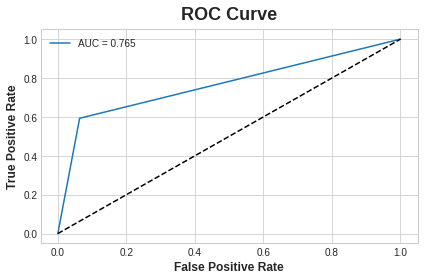

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate (FPR), true positive rate (TPR), and classification threshold for various thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(y_valid, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import classification_report
report=classification_report(y_valid,y_pred)
print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     18792
           1       0.85      0.59      0.70     11056

    accuracy                           0.81     29848
   macro avg       0.82      0.76      0.78     29848
weighted avg       0.81      0.81      0.80     29848



# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>

#BASIC Model

In [33]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train,y_train, epochs=25, verbose=0)

# Make predictions on the validation data
y_pred = (model.predict(X_valid) > 0.5).astype("int32")

# Evaluate the performance of the model using accuracy as the metric
accuracy = model.evaluate(X_valid, y_valid)[1]
print(f"Accuracy: {accuracy:.3f}")


933/933 [==============================] - 2s 2ms/step - loss: 0.4349 - accuracy: 0.8088
Accuracy: 0.809


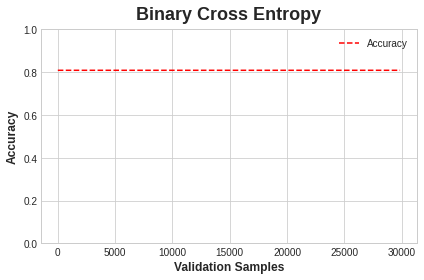

In [34]:
plt.plot([accuracy]*len(y_valid), 'r--', label='Accuracy')
plt.legend()
plt.ylim([0.0, 1.0])
plt.title('Binary Cross Entropy')
plt.xlabel('Validation Samples')
plt.ylabel('Accuracy')
plt.show()

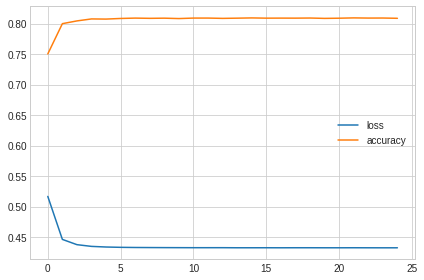

In [35]:
pd.DataFrame(history.history).plot();

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 63        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


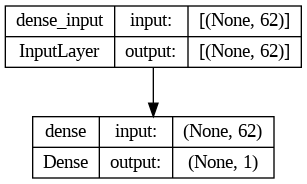

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Model with one hidden layer

In [38]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(300,activation='relu'))
model_1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

Epoch 1/5
2799/2799 [==============================] - 11s 4ms/step - loss: 0.4164 - accuracy: 0.8071
Epoch 2/5
2799/2799 [==============================] - 10s 4ms/step - loss: 0.3909 - accuracy: 0.8176
Epoch 3/5
2799/2799 [==============================] - 10s 4ms/step - loss: 0.3807 - accuracy: 0.8236
Epoch 4/5
2799/2799 [==============================] - 10s 4ms/step - loss: 0.3737 - accuracy: 0.8268
Epoch 5/5
2799/2799 [==============================] - 9s 3ms/step - loss: 0.3669 - accuracy: 0.8311

 History keys

dict_keys(['loss', 'accuracy']) 



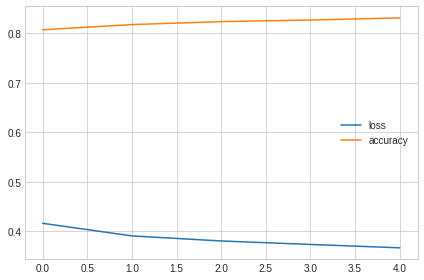

In [39]:
tf.random.set_seed(100)
history=model_1.fit(X_train,y_train,epochs=5)
hist=pd.DataFrame(history.history)
print("\n History keys\n")
print(history.history.keys(),"\n")
hist.plot();

In [40]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 300)               18900     
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_1.evaluate(X_valid,y_valid)

933/933 [==============================] - 3s 3ms/step - loss: 0.3740 - accuracy: 0.8266


[0.3740158975124359, 0.8265880346298218]

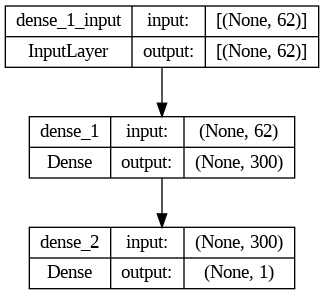

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model_1,show_shapes=True)

In [43]:
weights = model_1.layers[0].get_weights()[0]

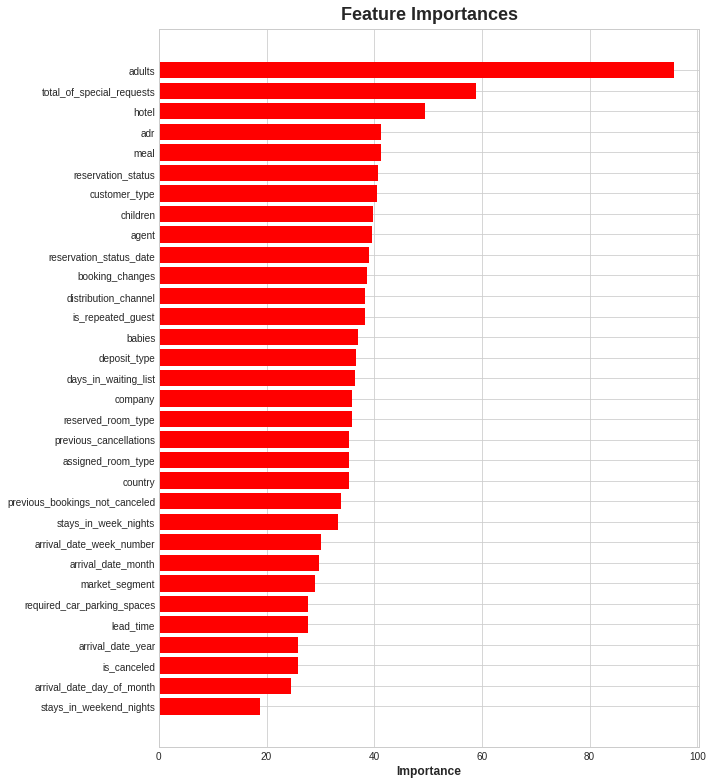

In [44]:
importance = np.sum(np.abs(weights), axis=1)
# Combine feature names and importances into a list
features = list(hotel.columns)
importance_list = list(zip(features, importance))

# Sort the list by importance in descending order
importance_list.sort(key=lambda x: x[1], reverse=True)

# Extract the feature names and importances into separate lists
feature_names, feature_importances = zip(*importance_list)

# Create a horizontal bar graph of the feature importances
fig, ax = plt.subplots(figsize=(10, 11))
y_pos = np.arange(len(feature_names))
ax.barh(y_pos, feature_importances, align='center', color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')
plt.show()

### Model 3 - With normalisation

In [45]:
# Normalization

normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_valid)

X_train1=normalizer(X_train)
X_test1=normalizer(X_valid)

Epoch 1/10
2799/2799 [==============================] - 11s 3ms/step - loss: 53.0286 - accuracy: 0.8046
Epoch 2/10
2799/2799 [==============================] - 10s 3ms/step - loss: 10.7346 - accuracy: 0.8154
Epoch 3/10
2799/2799 [==============================] - 9s 3ms/step - loss: 60.5207 - accuracy: 0.8203
Epoch 4/10
2799/2799 [==============================] - 10s 3ms/step - loss: 82.3326 - accuracy: 0.8226
Epoch 5/10
2799/2799 [==============================] - 10s 3ms/step - loss: 46.5245 - accuracy: 0.8255
Epoch 6/10
2799/2799 [==============================] - 10s 3ms/step - loss: 60.1465 - accuracy: 0.8270
Epoch 7/10
2799/2799 [==============================] - 10s 3ms/step - loss: 22.3549 - accuracy: 0.8294
Epoch 8/10
2799/2799 [==============================] - 9s 3ms/step - loss: 35.8479 - accuracy: 0.8302
Epoch 9/10
2799/2799 [==============================] - 10s 4ms/step - loss: 3.9134 - accuracy: 0.8324
Epoch 10/10
2799/2799 [==============================] - 10s 4ms/st

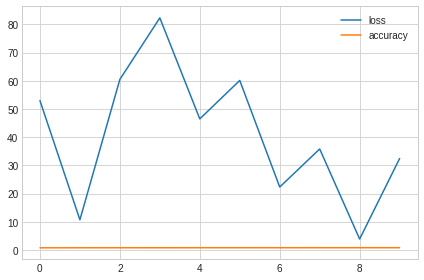

In [46]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(300,activation='relu'))
model_2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])


# Training the model
tf.random.set_seed(100)

# X_train is the normalosed training set
hist_2=model_2.fit(X_train1,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

In [47]:
model_2.evaluate(X_valid,y_valid)

933/933 [==============================] - 2s 2ms/step - loss: 0.4459 - accuracy: 0.7974


[0.4458920955657959, 0.797373354434967]

###Normalization is of the data is resulting in over-fitting

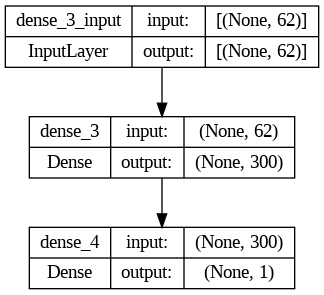

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model_2,show_shapes=True)

## Model 4 - With cross validation

Epoch 1/7
2239/2239 [==============================] - 10s 4ms/step - loss: 0.4182 - accuracy: 0.8068 - val_loss: 0.4076 - val_accuracy: 0.8112
Epoch 2/7
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3929 - accuracy: 0.8170 - val_loss: 0.3918 - val_accuracy: 0.8198
Epoch 3/7
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3835 - accuracy: 0.8207 - val_loss: 0.3885 - val_accuracy: 0.8226
Epoch 4/7
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3755 - accuracy: 0.8257 - val_loss: 0.3825 - val_accuracy: 0.8244
Epoch 5/7
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3698 - accuracy: 0.8287 - val_loss: 0.3840 - val_accuracy: 0.8234
Epoch 6/7
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3653 - accuracy: 0.8306 - val_loss: 0.3754 - val_accuracy: 0.8289
Epoch 7/7
2239/2239 [==============================] - 8s 4ms/step - loss: 0.3614 - accuracy: 0.8325 - val_loss: 0.3777 - val_accuracy: 0.828

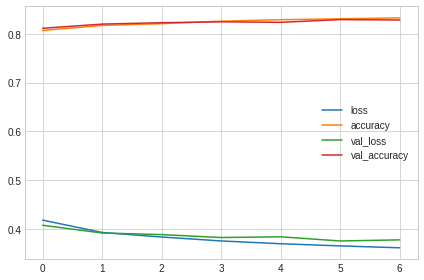

In [49]:
# cross validation

model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(300,activation='relu'))
model_3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Training the model
tf.random.set_seed(100)

# validation_split
hist_3=model_3.fit(X_train,y_train,epochs=7,validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

In [50]:
model_3.evaluate(X_valid,y_valid)

933/933 [==============================] - 3s 3ms/step - loss: 0.3765 - accuracy: 0.8240


[0.37648332118988037, 0.8240417838096619]

## Earlystopping

Epoch 1/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.4186 - accuracy: 0.8059 - val_loss: 0.4082 - val_accuracy: 0.8095
Epoch 2/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3937 - accuracy: 0.8163 - val_loss: 0.3924 - val_accuracy: 0.8188
Epoch 3/10
2239/2239 [==============================] - 10s 5ms/step - loss: 0.3845 - accuracy: 0.8203 - val_loss: 0.3904 - val_accuracy: 0.8209
Epoch 4/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3766 - accuracy: 0.8246 - val_loss: 0.3838 - val_accuracy: 0.8242
Epoch 5/10
2239/2239 [==============================] - 8s 4ms/step - loss: 0.3711 - accuracy: 0.8284 - val_loss: 0.3831 - val_accuracy: 0.8239
Epoch 6/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3667 - accuracy: 0.8295 - val_loss: 0.3765 - val_accuracy: 0.8291
Epoch 7/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3630 - accuracy: 0.8325 - val_loss: 0.3771 - val_accuracy

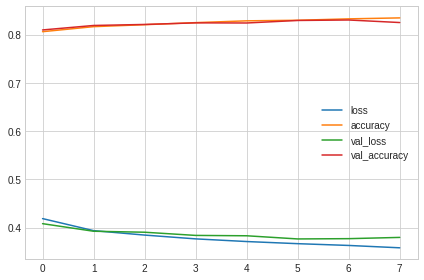

In [51]:
# earlystop

model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(300,activation='relu'))
model_5.add(tf.keras.layers.Dense(1,activation='sigmoid'))


# Compiling the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_5=model_5.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_5.history).plot();

In [52]:
model_5.evaluate(X_valid,y_valid)

933/933 [==============================] - 3s 3ms/step - loss: 0.3786 - accuracy: 0.8236


[0.3785730302333832, 0.8236062526702881]

## **Model 6 - With batch normalization**

Epoch 1/10
2239/2239 [==============================] - 13s 5ms/step - loss: 0.4509 - accuracy: 0.7886 - val_loss: 0.4236 - val_accuracy: 0.8059
Epoch 2/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.4165 - accuracy: 0.8081 - val_loss: 0.4017 - val_accuracy: 0.8174
Epoch 3/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.4055 - accuracy: 0.8120 - val_loss: 0.3994 - val_accuracy: 0.8136
Epoch 4/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.4008 - accuracy: 0.8140 - val_loss: 0.3917 - val_accuracy: 0.8211
Epoch 5/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3967 - accuracy: 0.8167 - val_loss: 0.3909 - val_accuracy: 0.8201
Epoch 6/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3928 - accuracy: 0.8185 - val_loss: 0.3888 - val_accuracy: 0.8208
Epoch 7/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3908 - accuracy: 0.8190 - val_loss: 0.3881 - val_ac

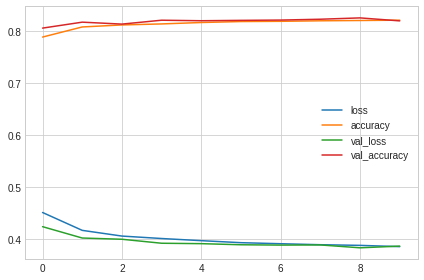

In [53]:
# batch normalisation

model_6=tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(30,activation='relu'))
model_6.add(tf.keras.layers.Dense(8,activation='relu'))


# Batch Normalisation
model_6.add(tf.keras.layers.BatchNormalization())
model_6.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compiling the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_6=model_6.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_6.history).plot();

In [54]:
model_6.evaluate(X_valid,y_valid)

933/933 [==============================] - 3s 3ms/step - loss: 0.3848 - accuracy: 0.8199


[0.3848026692867279, 0.8198874592781067]

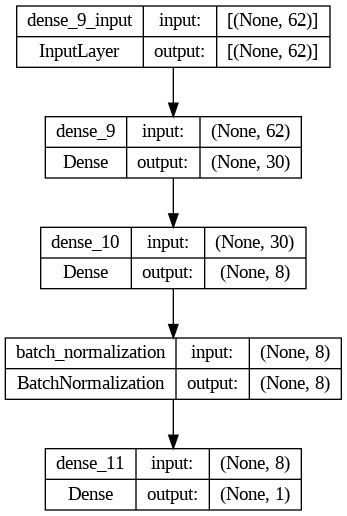

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model_6,show_shapes=True)


## **Model 7 - with 2 hidden layers**

Epoch 1/10
2239/2239 [==============================] - 11s 4ms/step - loss: 0.4352 - accuracy: 0.8014 - val_loss: 0.4106 - val_accuracy: 0.8105
Epoch 2/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.4013 - accuracy: 0.8125 - val_loss: 0.4008 - val_accuracy: 0.8177
Epoch 3/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.3940 - accuracy: 0.8159 - val_loss: 0.3961 - val_accuracy: 0.8164
Epoch 4/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.3882 - accuracy: 0.8175 - val_loss: 0.3905 - val_accuracy: 0.8198
Epoch 5/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.3843 - accuracy: 0.8196 - val_loss: 0.3910 - val_accuracy: 0.8196
Epoch 6/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.3815 - accuracy: 0.8210 - val_loss: 0.3878 - val_accuracy: 0.8210
Epoch 7/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.3794 - accuracy: 0.8225 - val_loss: 0.3885 - val_acc

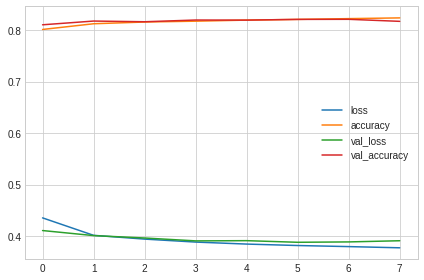

In [56]:
# with 2 hidden layers

model_7=tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(30,activation='relu'))

## Adding one more layer
model_7.add(tf.keras.layers.Dense(10,activation='relu'))

model_7.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compiling the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_7=model_7.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_7.history).plot();

In [57]:
model_7.evaluate(X_valid,y_valid)

933/933 [==============================] - 2s 2ms/step - loss: 0.3887 - accuracy: 0.8184


[0.388693243265152, 0.8184468150138855]

## **Model 8 - 2 hidden layers (value change)**

Epoch 1/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.4530 - accuracy: 0.7933 - val_loss: 0.4278 - val_accuracy: 0.8067
Epoch 2/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.4198 - accuracy: 0.8088 - val_loss: 0.4164 - val_accuracy: 0.8115
Epoch 3/10
2239/2239 [==============================] - 10s 4ms/step - loss: 0.4117 - accuracy: 0.8101 - val_loss: 0.4137 - val_accuracy: 0.8084
Epoch 4/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.4067 - accuracy: 0.8112 - val_loss: 0.4093 - val_accuracy: 0.8138
Epoch 5/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.4032 - accuracy: 0.8121 - val_loss: 0.4084 - val_accuracy: 0.8129
Epoch 6/10
2239/2239 [==============================] - 9s 4ms/step - loss: 0.4002 - accuracy: 0.8127 - val_loss: 0.4057 - val_accuracy: 0.8137
Epoch 7/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3982 - accuracy: 0.8131 - val_loss: 0.4037 - val_accura

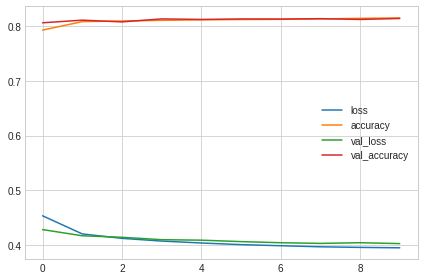

In [58]:
# changed units

model_8=tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(8,activation='relu'))

model_8.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compiling the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_8=model_8.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_8.history).plot();



In [59]:
model_8.evaluate(X_valid,y_valid)

933/933 [==============================] - 2s 3ms/step - loss: 0.3958 - accuracy: 0.8144


[0.39580947160720825, 0.8143929243087769]

## **Model 9 - with 4 hidden layers**

Epoch 1/10
2799/2799 [==============================] - 14s 4ms/step - loss: 0.4129 - accuracy: 0.8072
Epoch 2/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3834 - accuracy: 0.8229
Epoch 3/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3707 - accuracy: 0.8294
Epoch 4/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3621 - accuracy: 0.8332
Epoch 5/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3540 - accuracy: 0.8378
Epoch 6/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3488 - accuracy: 0.8403
Epoch 7/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3433 - accuracy: 0.8428
Epoch 8/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3365 - accuracy: 0.8459
Epoch 9/10
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3318 - accuracy: 0.8472
Epoch 10/10
2799/2799 [==============================] - 12s 4ms/step - l

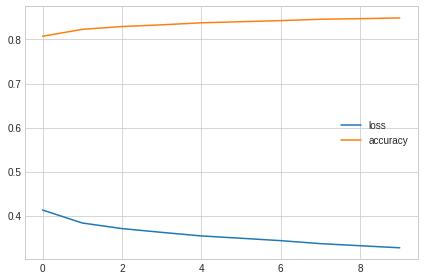

In [60]:
# with 4 hidden layers

model_9=tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(200,activation='relu'))

model_9.add(tf.keras.layers.Dense(90,activation='relu'))
model_9.add(tf.keras.layers.Dense(70,activation='relu'))
model_9.add(tf.keras.layers.Dense(10,activation='relu'))
model_9.add(tf.keras.layers.Dense(40,activation='relu'))

model_9.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compiling the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training
tf.random.set_seed(100)
hist_9=model_9.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_9.history).plot();

In [61]:
model_9.evaluate(X_valid,y_valid)

933/933 [==============================] - 3s 3ms/step - loss: 0.3595 - accuracy: 0.8365


[0.35949498414993286, 0.8365049362182617]

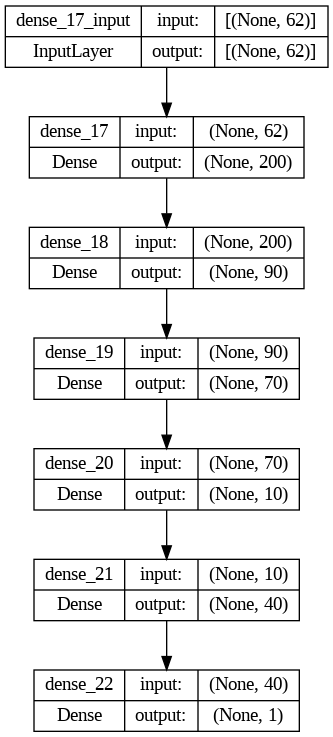

In [62]:

from tensorflow.keras.utils import plot_model

plot_model(model_9,show_shapes=True)


## **Model 10 - with hidden layers (value change)**

Epoch 1/10
2239/2239 [==============================] - 13s 5ms/step - loss: 0.4159 - accuracy: 0.8057 - val_loss: 0.4045 - val_accuracy: 0.8135
Epoch 2/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3867 - accuracy: 0.8205 - val_loss: 0.3887 - val_accuracy: 0.8253
Epoch 3/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3743 - accuracy: 0.8282 - val_loss: 0.3793 - val_accuracy: 0.8277
Epoch 4/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3639 - accuracy: 0.8328 - val_loss: 0.3762 - val_accuracy: 0.8250
Epoch 5/10
2239/2239 [==============================] - 11s 5ms/step - loss: 0.3562 - accuracy: 0.8366 - val_loss: 0.3731 - val_accuracy: 0.8300
Epoch 6/10
2239/2239 [==============================] - 12s 5ms/step - loss: 0.3492 - accuracy: 0.8390 - val_loss: 0.3664 - val_accuracy: 0.8339
Epoch 7/10
2239/2239 [==============================] - 15s 7ms/step - loss: 0.3432 - accuracy: 0.8428 - val_loss: 0.3752 - val_ac

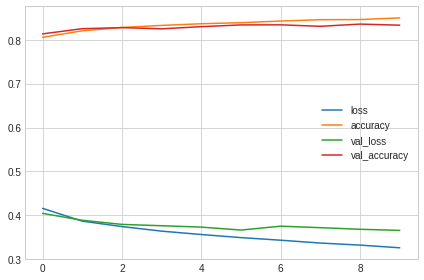

In [63]:
# with 4 hidden layers

model_10=tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(100,activation='relu'))

model_10.add(tf.keras.layers.Dense(200,activation='relu'))
model_10.add(tf.keras.layers.Dense(300,activation='relu'))
model_10.add(tf.keras.layers.Dense(70,activation='relu'))
model_10.add(tf.keras.layers.Dense(220,activation='relu'))

model_10.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compiling the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Training
tf.random.set_seed(100)

hist_10=model_10.fit(X_train,y_train,validation_split=0.2,epochs=10)
pd.DataFrame(hist_10.history).plot();

In [64]:
model_10.evaluate(X_valid,y_valid)

933/933 [==============================] - 2s 3ms/step - loss: 0.3630 - accuracy: 0.8338


[0.3629591464996338, 0.8338246941566467]

In [65]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               6300      
                                                                 
 dense_24 (Dense)            (None, 200)               20200     
                                                                 
 dense_25 (Dense)            (None, 300)               60300     
                                                                 
 dense_26 (Dense)            (None, 70)                21070     
                                                                 
 dense_27 (Dense)            (None, 220)               15620     
                                                                 
 dense_28 (Dense)            (None, 1)                 221       
                                                                 
Total params: 123,711
Trainable params: 123,711
Non-tr